In [ ]:
#This notebook is by Anastasia Ruzmaikina

A Forex trading strategy I considered recently was designed to increase the Sharpe ratio of USDJPY.

USDJPY exchange rate has been increasing on average from 2020 to 2024. For example, on November 2nd of 2020 the USDJPY exchange rate was 104.58 yen per dollar and on November 1 of 2024 the USDJPY exchange rate was 151.98, which is a 45.32% increase over four years. 

However, running a backtest on a strategy that invests $1,000,000 in USDJPY on 11/01/2020 and ends on 08/05/2024 (the current backtest end date) gives a Sharpe ratio of 0.374 and return of 27.67\%, which is much lower than the Sharpe ratio of 0.559 and return of 64.31\% for the same ‘buy and hold’ strategy on S&P500 over the same time period. The reason for the low Sharpe ratio is that USDJPY has a high volatility. For example, USDJPY rate was 161.62 on 07/04/2024 and dropped down to 140.79 on 09/16/2024.

To increase the Sharpe ratio I can isolate the intervals where USDJPY is increasing and liquidate the position when it is decreasing. 

A very reliable indicator, which is often used in Forex trading, is the Ichimoku Kinko Hyo Indicator.

In particular, if Ichimoku Tenkan crosses above Ichimoku Kijun, it is considered a ‘buy’ signal, while if Ichimoku Tenkan crosses below Ichimoku Kijun, it is considered a ‘sell’ signal.

Since both Tenkan-sen and Kijun-sen are dependent on multiple periods, they are delayed in time indicators and therefore should be used only in the same direction as the average direction of price changes. 

For example, using ‘Tenkan above Kijun’ crossover to buy and then ‘Tenkan below Kijun’ crossover to liquidate the position would work well if the price is increasing on average (so that the buy price is likely to be below sell price); however, due to the time delay in the indicators, the same strategy would be less likely to work if the price is decreasing on average.

To increase the Sharpe ratio, I buy USDJPY if Ichimoku Tenkan crosses above Ichimoku Kijun, and liquidate the position when  Ichimoku Tenkan crosses below Ichimoku Kijun.

I run a backtest starting 11/01/2020. It shows that the strategy works 89\% of the time (this is the Win Rate), increases the Sharpe ratio to 0.906 and the return to 43.16\%.

The backtest for this algorithm is at:
https://www.quantconnect.com/project/20102474/cdcd0c6a3ee752b95a4cf47a670f6bff

To increase the Sharpe ratio further, I buy EURUSD when we liquidate USDJPY position and liquidate EURUSD position when I buy USDJPY. Thus the strategy holds USDJPY when Tenkan is above Kijun and otherwise holds EURUSD. Since the currency pair USDJPY, EURUSD is negatively correlated, with the correlation coefficient -0.7788 for 11/02/2020 to 11/01/2024 time period, the strategy works 76\% of the time. The Sharpe ratio is increased to 1.032 and the total return is 60.64\%.

The backtest for this algorithm is at:
https://www.quantconnect.com/project/20102472/01c462e0db44127cb090ffb47487f2ed

While buying and holding S&P500 makes a higher profit, it is worth noting that the drawdown for the USDJPY strategy is 5.8\%, which is much lower than 24.6\% drawdown for the strategy that buys and holds S&P500 over the same time period.



***********************

Following the work I did on the project you sent me, I was thinking about other possible 'short term win' alphas. 

I found an algoirthm by Derek Melchin in Research section of Quantconnect, where he used 'Black Friday' on Amazon as a short-term investment and otherwise invests in S&P500. He used put options to hedge the Amazon investment.

I used his algorithm as a starting point, but tried two other alphas.
The first alpha was to invest in 30\% eBay and 70\% Etsy for the month before Christmas, and otherwise invest in S&P500. Surprisingly, it works for 2012-2024 time period (that is it does better than S&P500 by itself), with Sharpe ratio 0.651, win rate 69\%, drawdown 33.6%, compounding annual return of 14.627\%. (This algorithm was not hedged).

The backtest for this algorithm is at: https://www.quantconnect.com/project/20046952/dae167d63b9788cfa757765217b4a11c

The second alpha was to buy the stocks in 'AMZN', 'GOOGL', 'AAPL', 'MSFT', 'META' before they announced their quarterly earnings (they all announce the earnings during the same week) and hold the stocks for two weeks, then switch to S&P500. In addition, the 30 day put options on all five are used for hedging. 
This strategy backtested over 2012-2024 time period outperforms S&P500 by itself, with Sharpe ratio 0.749, drawdown 33.6\% and compounding annual return of 18.449\%.

The backtest for this algorithm is at:
https://www.quantconnect.com/project/20060252/607d3be63c40ff6f0ab3a67eaf62f581



*******************

Most of my time is spent thinking about different trading bots.

This summer, I worked on the the algorithm which would trade from open to close in EURUSD, then exit. The idea of the strategy was to buy when it was going down but indicators showed that it was likely to reverse (such as being close to min) and to sell when it was going up, but indicators showed that it was likely to reverse (such as being close to max).

This strategy was designed to exit if the portfolio dropped below 99\% of its original value. For the purposes of the backtest, the portfolio always started at 50,000 USD. 

The strategy was based on mean reversion idea. It looked for 'buy' situations where RSI < 40 (or is 20 less than previous value where 'sell' conditions were met), EURUSD was less than 1.0002 of its min value, RSI was currently increasing, EURUSD was below lower Bollinger band value, SMA(5) < SMA(8) < SMA(13). The EURUSD could be bought up to three cosecutive times, after that no 'buys' could be made until the positions were liquidated when 'sell' conditions were met. 

The 'sell' conditions were met if RSI > 60 (or is 20 more than previous value when 'buy' conditions were met), EURUSD was above 0.9998 of its maximum value, EURUSD was above upper Bollinger band value, SMA(5) > SMA(8) > SMA(13). The EURUSD could be sold up to three times, after that no 'sells' could be made until the positions were liquidated when 'buy' conditions were met.

In a nutshell, the strategy 'buys' when it is still decreasing but close to min and 'sells' when it is still increasing but close to max. 

On the days on which the strategy worked, it made a lot. Other days it exited when 1\% (i.e. 500 USD) was lost.

The backtests on this strategy had to be done separately for each day, so I don't have Sharpe ratio (because the time interval was too short and only profits were displayed). However, I added up cumulative profits from 01/01/2023 to 5/7/2024 and the total profits were around 26,131 USD, which is 52\% return over 16 months.

The backtest for this algorithm (for the day of 4/5/2022) is: https://www.quantconnect.com/project/18953299/7977e736c257b3e769d6d50af18c81ab
 


The results for cumulative profits made starting daily with 50,000 principal (starting at 0 on 01/01/2023 and ending at 26,131 on 5/7/2024) are shown on the graph below.

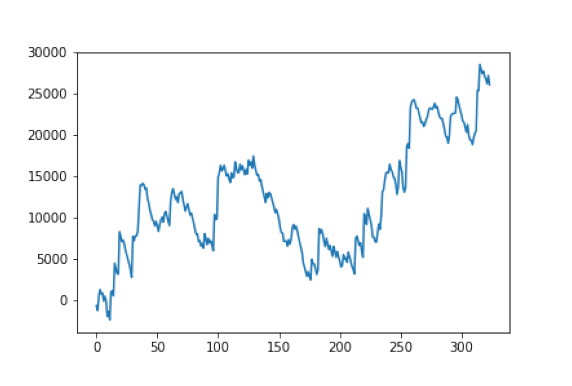

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
image_path = '/Users/anastasia/quantconnect/current/forex-July29-results/Results_for_Jan_2023_Apr_2024.png'
image = mpimg.imread(image_path)
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(image)
ax.axis('off')
plt.show()

*****************

The following strategies are daily strategies, because they exit if portfolio drops below 99\%. Therefore the backtest is run from open till close on the same day.

I worked on a lot of strategies which have to be run in pairs. A 'call' strategy, which does 'Something' and exits if portfolio drops to 99\% of its original value. A 'put' strategy does 'Opposite of Something' and exits if portfolio drops to 99\% of its original value. 

The idea is that if 'call' strategy does well, then 'put' strategy would not lose a lot. Similarly, if a 'put' strategy does well, then 'call' strategy does not lose a lot. 

For example, the 'call' strategy is: 

'buy' if RSI < 30, EURUSD is below lower Bollinger band value and TEMA value is less than 1.0001 of minimal TEMA value. Can 'buy' up to three times before have to wait for a 'sell' signal to liquidate.

'sell' if RSI > 65, EURUSD is above upper Bollinger band value and TEMA value is above 0.9999 of maximal TEMA value. Can 'sell' up to three times before have to wait for a 'buy' signal to liquidate.

The backtest for this strategy for the date of 7/10/2023 is: https://www.quantconnect.com/project/18542842/bc1e292b194fdcb4c8db7b06d3cce700

The 'put' strategy is:


'sell' if RSI < 30, EURUSD is below lower Bollinger band value and TEMA value is less than 1.0001 of minimal TEMA value. Can 'sell' up to three times before have to wait for a 'buy' signal to liquidate.

'buy' if RSI > 65, EURUSD is above upper Bollinger band value and TEMA value is above 0.9999 of maximal TEMA value. Can 'buy' up to three times before have to wait for a 'sell' signal to liquidate.


The backtest for this strategy for the date of 1/3/2022 is at: 
https://www.quantconnect.com/project/18545776/94c5e1b354ac5ea4262e311545ed2eba




***************

A similar strategy for S&P500 is done on weekly basis so that the algorithm exits if portfolio drops to 95\% of its initial value (from 100,000 to 95,000). 

In this strategy, if SPY price drops below lower Bollinger band value and Fast Stochastic Oscillator drops below 20, 'buy' SPY. If SPY price exceeds upper Bollinger band value and Fast Stochastic Oscillator exceeds 80, liquidate SPY position.

This strategy does well on some weeks and not on others, but on the weeks it does well, the Sharpe ratio is very high. For example on 3/23/2023 - 3/31/2023, the Sharpe ratio is 23.00, the return for the week is 4.15% (which gives 454.4% compounding annual return), drawdown for the week is 0.9%.

The backtest for this strategy for the week 3/23/2023 - 3/31/2023 is: https://www.quantconnect.com/project/18102796/06483f9987364d3f17d162aac076a7dd


*****************

A forex strategy for EURUSD done on the weekly basis exits if portfolio drops to 95\% of its initial value of 100,000. The indicators have minute resolution.

The 'buy' signal is if current value of TEMA is greater than previous value of TEMA and EURUSD price is greater than the current value of Ichimoku Tenkan-Sen indicator. In this case, buy 50,000 EURUSD.

The 'sell' signal is if the current value of TEMA is less than previous value of TEMA and current value of SMA(60) is less than previous value of SMA(60). In this case, liquidate portfolio.

This strategy performs well on some weeks and not others, for example it did well on the week from 3/8/2023 to 3/14/2023. It made 82.96% return in one week, resulting in compounding annual return of $5782200401006150$\% and Sharpe ratio of $52101538472.926$ and drawdown of 37.1\%.

The backtest for this strategy for 3/8/2023-3/14/2023 is:
https://www.quantconnect.com/project/18019125/acd535ba55a076889070effec22b60ef





*********************

My favorite strategy for stocks is the one I uploaded to GitHub and you have seen already. 
It can be found at: https://github.com/anastasiaruzmaikina/anastasiaruzmaikina/blob/main/stock_trading_strategies_very_low_risk_demonstration.ipynb

If I start trading stocks, I shall definitely attempt this or a very similar strategy. The reason I like this strategy, is because it has a Sharpe ratio of 4.6 over a period of five years and has a very low drawdown. In fact, in many backtests it looks like it does not lose money at all.

This is a long only strategy, i.e. it concentrates on predicting which stocks are going up in price on the next time step (those stocks would have positive log returns) and is buying only those stocks. In fact, as required by the backtest, only top 5 (or another specified number such as top 3) best stocks are bought at each time step. The goal of the strategy is to make an accurate prediction of the most promising stocks to buy for the next time step or if such prediction is deemed impossible, to find conditions under which to "sit out" that time step.

The criteria applied to the stocks to pick out the "promising" stocks have to do with the linear combination of moving averages with different size windows, the linear combination of the exponentially weighted moving averages with different size windows, predictions made by the polynomial linear regression, performance of the stock on the previous time steps, and other criteria applied to the individual stocks.

The stocks which perform well according to all of these criteria are added to the array "sig" of recommended stocks, with the weight equal to the score attached to each stock (the heigher the weight, the more promising is the stock).

It turns out that sometimes the criteria listed above fail to predict the performance of the stock at the next time step. I noticed that this usually occurs in the 'high volatility regions'. To separate out the 'high volatility regions' I calculate several indicators having to do with the first, second and third discrete derivatives of second and third moments of log returns of the individual stocks as well as of the averages over all of the stocks. I then drop the stocks which have a high 'volatility score' from the array of recommended stocks "sig", assigning them weight zero instead.

The backtesting program picks only top 5 (or another specified number such as 3) of the stocks with the heighest weights (where weights are normalized to add up to 1) to trade at each time step.

I noticed that the strategy 'lowvol2' is very cautious and very low risk. The backtest results show that the strategy does not lose money, but has periods of time when it stops trading. The results of the backtest show that depending on the values of the parameters, the strategy earns on average about 82% to 98% increase in the cumulative PnL percentage of the portfolio per year. The interesting thing about the strategy is that it does not follow individual stocks, so it is completely automated once the parameters have been tuned.

*************************

My plans for the near future include trying the following strategies:

First Strategy: Use a lot (something like 50 indicators) and train a XGBoost model or time series prediction model such as TTM to predict the next value of the stock price. (This idea came to me after I looked at a Kaggle competition going on right now to analyze financial data).

Second Strategy: take just the time series of a stock price and use a very advanced model such as Lag-Llama to predict future values. This can be done already on Quantconnect, because they have uploaded Chronos model (another advanced time-series predictive model) and shown a sample algorithm of how to use it.